In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import seaborn as sns

## Correlation

In [2]:
# Read the ice cream sales data, set the 'Month' as the index
ice_cream_data = Path("./ice_cream.csv")
ice_cream = pd.read_csv(ice_cream_data, index_col='Month')
ice_cream.head()

,Ice Cream Sales
Month,
January,175
February,150
March,200
April,190
May,250


In [3]:
# Read the drowning incident data, set the 'Month' as the index
drowning_data = Path("drowning.csv")
drowning = pd.read_csv(drowning_data, index_col="Month")
drowning.head()

,Drowning Incidents
Month,
January,0
February,1
March,3
April,2
May,10


In [4]:
# Combine the DataFrames: use the `concat` function to combine the two DataFrames by matching indexes
combined_df = pd.concat([ice_cream, drowning], axis="columns", join="inner")
combined_df

,Ice Cream Sales,Drowning Incidents
Month,,
January,175,0
February,150,1
March,200,3
April,190,2
May,250,10
June,275,12
July,275,13
August,300,16
September,260,14


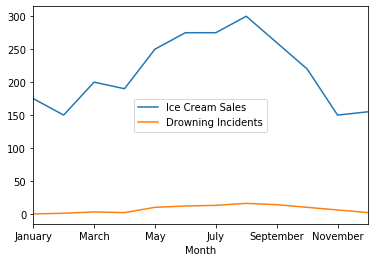

In [5]:
# Plot the data trends of the two variables over time
combined_df.plot()

# line graph is not a perfect way to visualize correlation. Line chart is for showing the trending.

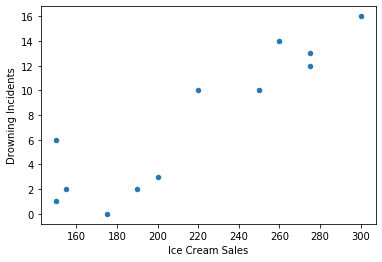

In [6]:
# Plot the relationship between the two variables
combined_df.plot(kind='scatter', x='Ice Cream Sales', y='Drowning Incidents')

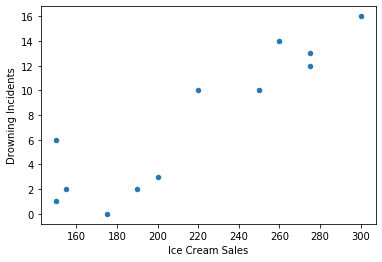

In [7]:
combined_df.plot.scatter(x='Ice Cream Sales', y='Drowning Incidents')

In [8]:
# Calculate Correlation: calculate the correlation between each column
correlation = combined_df.corr()
correlation

,Ice Cream Sales,Drowning Incidents
Ice Cream Sales,1.000000,0.904012
Drowning Incidents,0.904012,1.000000


In [9]:
# Plot correlations: use the `heatmap` function from the Seaborn library to visualize correlations

import seaborn as sns

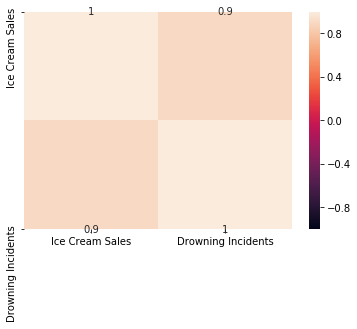

In [10]:
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

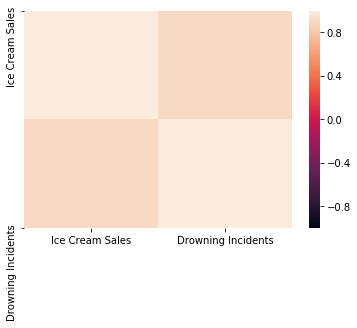

In [11]:
sns.heatmap(correlation, vmin=-1, vmax=1, annot=False)

## Rolling Statistics

In [12]:
aapl_df = pd.read_csv("AAPL.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
aapl_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
aapl_df.head()

,Close
Date,
2018-03-01,43.750000
2018-03-02,44.052502
2018-03-05,44.205002
2018-03-06,44.167500
2018-03-07,43.757500


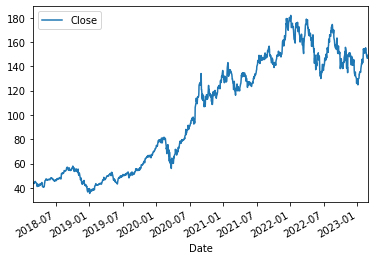

In [13]:
# Plot daily cloing prices of AAPL
aapl_df.plot()

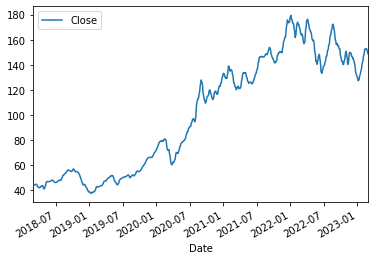

In [14]:
# Plot a rolling 7-day mean of AAPL's closing prices
aapl_df.rolling(window=7).mean().plot()

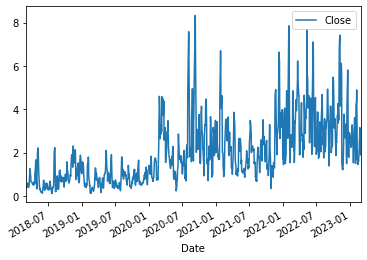

In [15]:
# Plot a rolling 7-day std dev of AAPL's closing prices
aapl_df.rolling(window=7).std().plot()

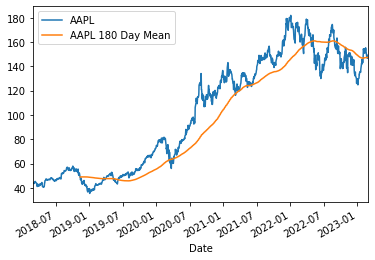

In [16]:
# Overlay Daily Closing Price and 180-Day Rolling Mean of AAPL
# Set figure of the daily closing prices of AAPL
ax = aapl_df.plot()     # this is my plot axis

# Plot 180-Day Rolling Mean on the same figure
aapl_df.rolling(window=180).mean().plot(ax=ax)     # want to add this to my plot

# Set the legend of the figure
ax.legend(["AAPL", "AAPL 180 Day Mean"]);

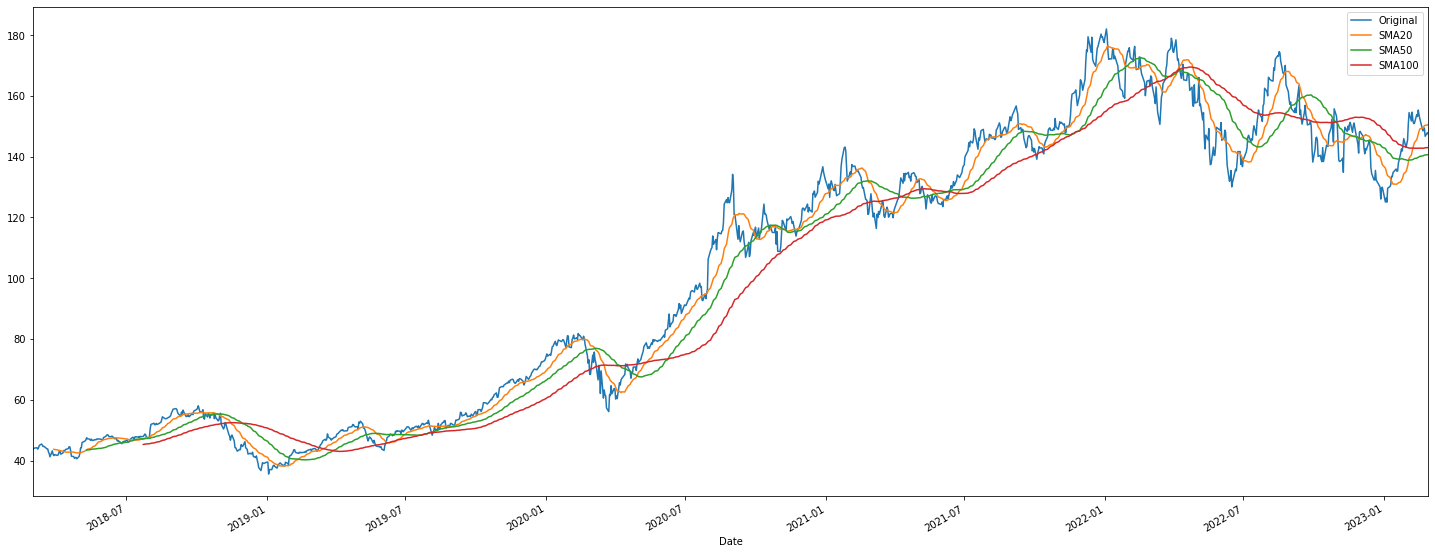

In [17]:
aapl_sma_20 = aapl_df.rolling(window=20).mean()
aapl_sma_50 = aapl_df.rolling(window=50).mean()
aapl_sma_100 = aapl_df.rolling(window=100).mean()

# Set figure of the daily closing prices of AAPL
ax = aapl_df.plot(figsize=(25, 10))

# Overlay SMA20, SMA50, and SMA100 on the same figure
aapl_sma_20.plot(ax=ax)
aapl_sma_50.plot(ax=ax)
aapl_sma_100.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Original", "SMA20", "SMA50", "SMA100"])

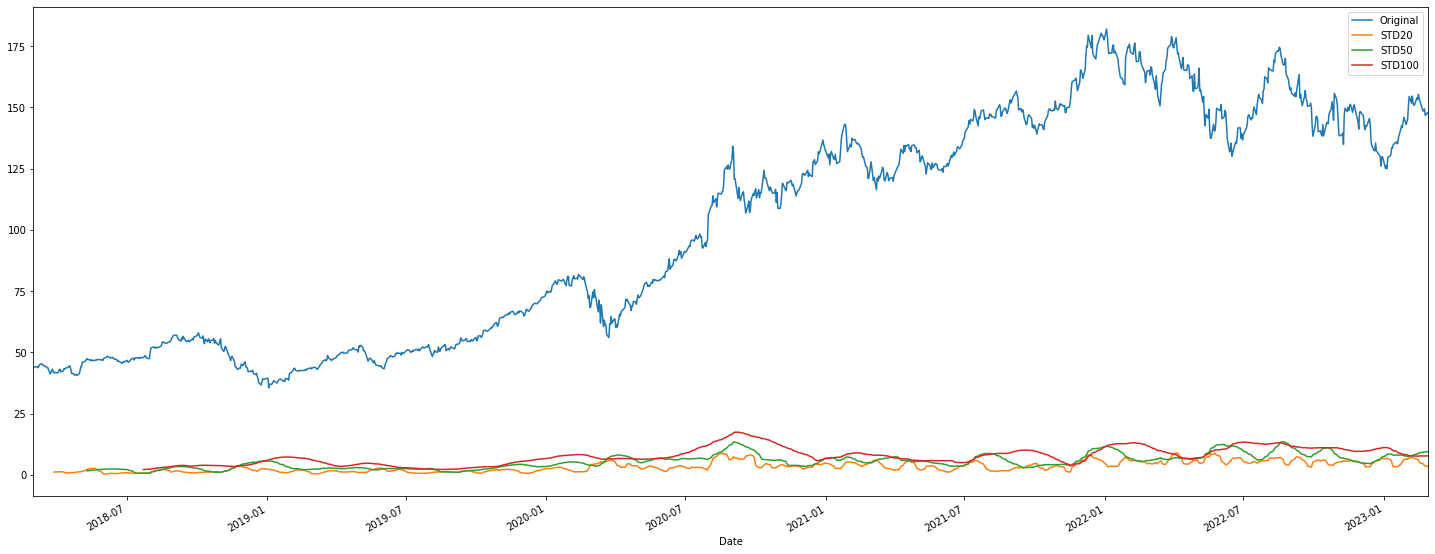

In [18]:
# Set figure of the daily closing prices of AAPL
ax = aapl_df.plot(figsize=(25,10))

# Overlay STD20, STD50, STD100 on the same figure
aapl_df.rolling(window=20).std().plot(ax=ax)
aapl_df.rolling(window=50).std().plot(ax=ax)
aapl_df.rolling(window=100).std().plot(ax=ax)

# Set the legend of the figure
ax.legend(['Original', 'STD20', 'STD50', 'STD100']);

## Beta

In [19]:
# Read the daily closing prices of S&P 500, set the `date` as a datetime index
sp500_data = Path("SPY.csv")
sp500_df = pd.read_csv(sp500_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)

In [20]:
# Combine DataFrame, Sort Index, and Rename Columns

# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([aapl_df, sp500_df], axis='columns', join='inner')

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Set column names to 'AAPL' and 'S&P 500'
combined_df.columns = ['AAPL', 'S&P 500']

# Display a few rows
combined_df.head()

,AAPL,S&P 500
Date,,
2018-03-01,43.750000,272.880005
2018-03-02,44.052502,272.779999
2018-03-05,44.205002,274.100006
2018-03-06,44.167500,278.869995
2018-03-07,43.757500,278.519989


In [21]:
# Calculate Daily Return: use the 'pct_change' function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns.head()

,AAPL,S&P 500
Date,,
2018-03-01,NaN,NaN
2018-03-02,0.006914,-0.000366
2018-03-05,0.003462,0.004839
2018-03-06,-0.000848,0.017402
2018-03-07,-0.009283,-0.001255


In [22]:
# Calculate covariance of all daily returns of AAPL vs. S&P 500
covariance = daily_returns['AAPL'].cov(daily_returns['S&P 500'])
covariance

-1.350720304084628e-05

In [23]:
# Calculate variance of all daily returns of AAPL vs. S&P 500
variance = daily_returns['AAPL'].var()
variance

daily_returns['AAPL'].std()
daily_returns['AAPL'].mean()
daily_returns['AAPL'].max()
daily_returns['AAPL'].min()
daily_returns['AAPL'].median()
daily_returns['AAPL'].count()
daily_returns['AAPL'].sum()
daily_returns['AAPL'].product()

-0.0

In [24]:
# Calculate beta of all daily returns of AAPL
aapl_beta = covariance / variance
aapl_beta

-0.03038571780384141

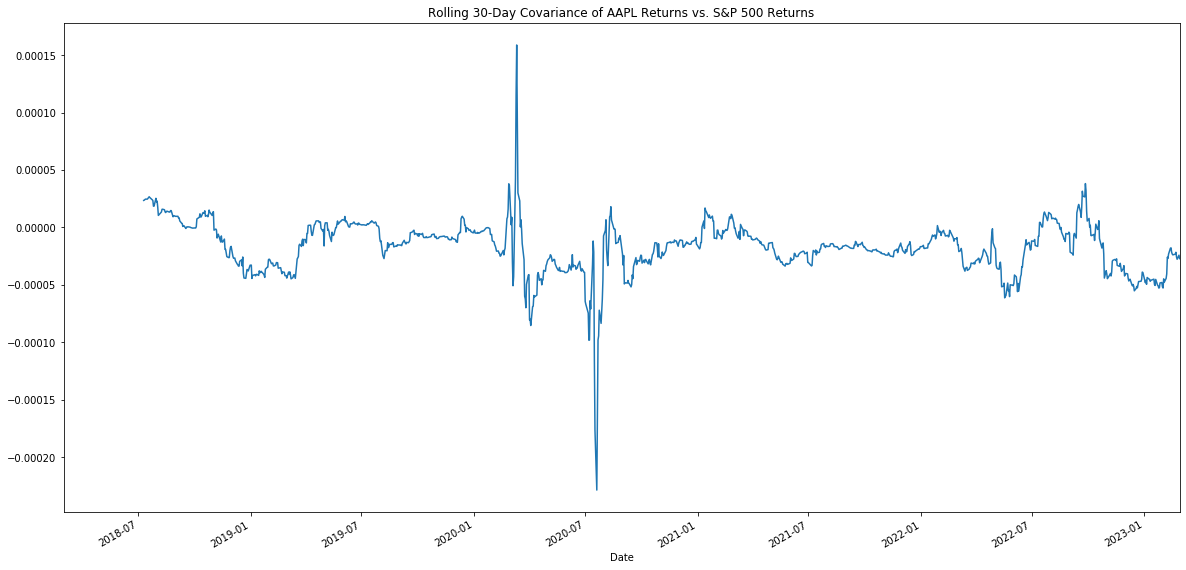

In [25]:
# Calculate 30-Day Rolling Covariance of AAPL Returns vs. S&P 500 Returns
rolling_covariance = daily_returns['AAPL'].rolling(window=90).cov(daily_returns['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of AAPL Returns vs. S&P 500 Returns')

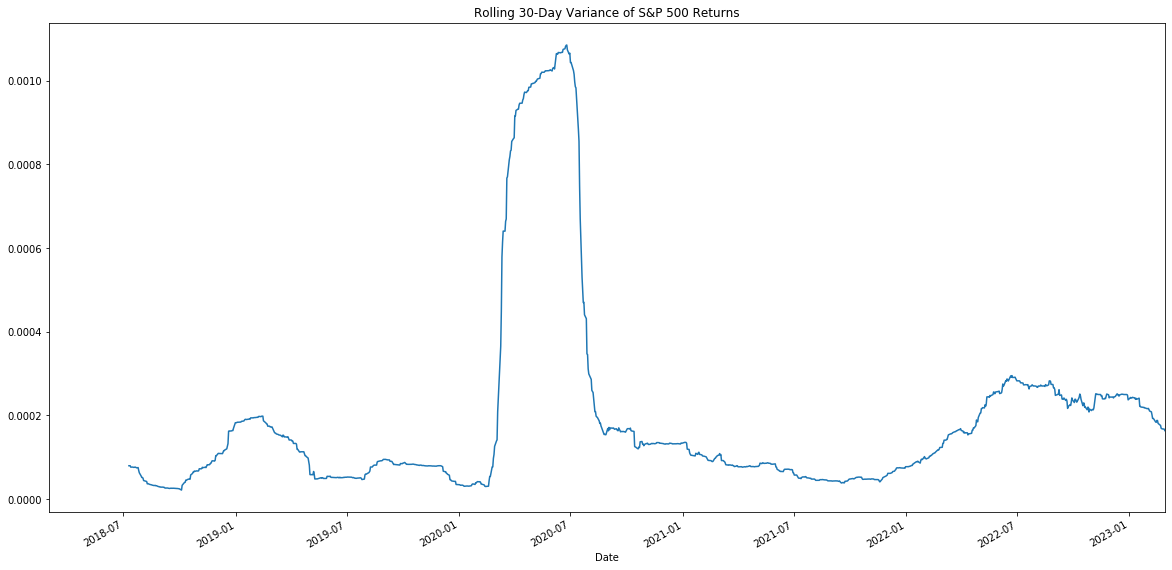

In [26]:
# Calculate 30-Day Rolling Variance of S&P 500 Returns
rolling_variance = daily_returns['S&P 500'].rolling(window=90).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns')

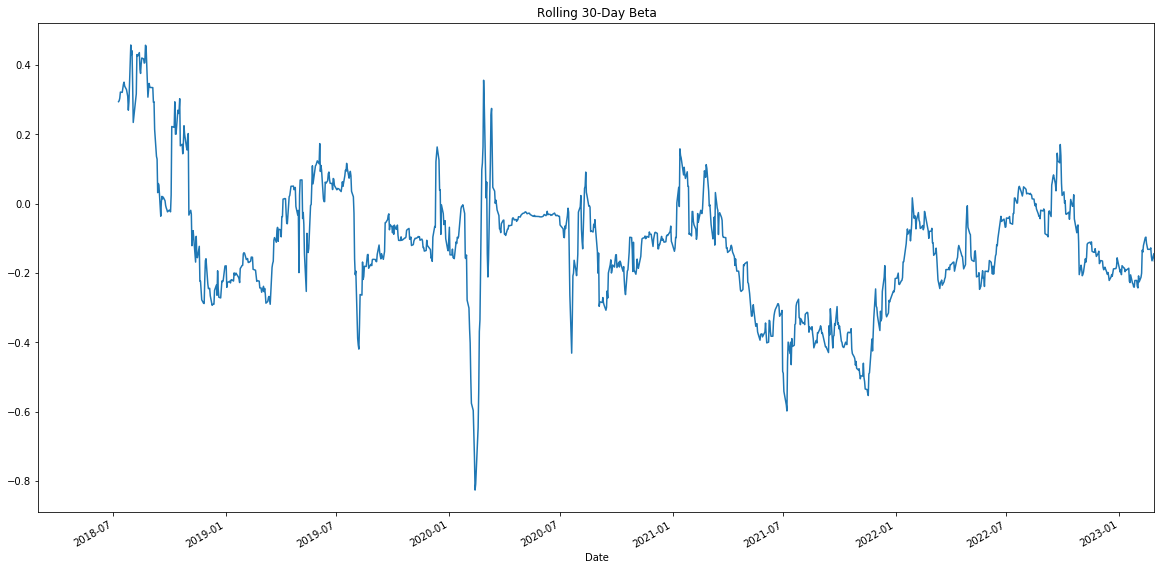

In [27]:
# Calculate 30-day Rolling Beta of AAPL
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title="Rolling 30-Day Beta")

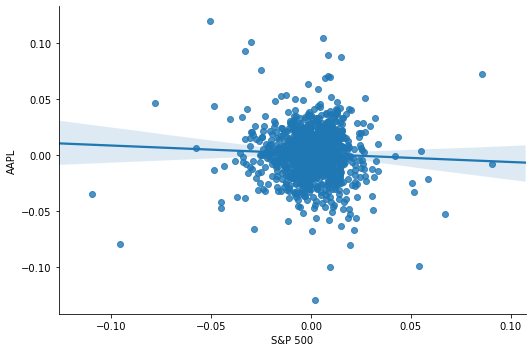

In [28]:
# Showcase beta vs. correlation by plotting a scatterplot using the Seaborn library and fitting a regression line
sns.lmplot(x='S&P 500', y='AAPL', data=daily_returns, aspect=1.5, fit_reg=True)

## Protfolio Return

In [29]:
aapl_df = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True, infer_datetime_format=False)
aapl_df.drop(columns=['Open', 'Adj Close', 'High', 'Low', 'Volume'], inplace=True)
aapl_df['Symbol'] = 'AAPL'
aapl_df.head()

,Close,Symbol
Date,,
2018-03-01,43.750000,AAPL
2018-03-02,44.052502,AAPL
2018-03-05,44.205002,AAPL
2018-03-06,44.167500,AAPL
2018-03-07,43.757500,AAPL


In [30]:
spy_df = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True, infer_datetime_format=False)
spy_df.drop(columns=['Open', 'Adj Close', 'High', 'Low', 'Volume'], inplace=True)
spy_df['Symbol'] = 'SPY'
spy_df.head()

,Close,Symbol
Date,,
2018-03-01,272.880005,SPY
2018-03-02,272.779999,SPY
2018-03-05,274.100006,SPY
2018-03-06,278.869995,SPY
2018-03-07,278.519989,SPY


In [31]:
# Create a new pivot table where the columns are the closing prices for each ticker
all_prices = pd.concat([aapl_df, spy_df], axis='rows', join='inner')
all_prices.reset_index(inplace=True)
all_prices = all_prices.pivot_table(values='Close', index='Date', columns='Symbol')
all_prices

Symbol,AAPL,SPY
Date,,
2018-03-01,43.750000,272.880005
2018-03-02,44.052502,272.779999
2018-03-05,44.205002,274.100006
2018-03-06,44.167500,278.869995
2018-03-07,43.757500,278.519989
...,...,...
2023-02-22,148.910004,397.730011
2023-02-23,149.399994,396.260010
2023-02-24,146.710007,394.739990


In [32]:
# Calculate Daily Return
all_returns = all_prices.pct_change()
all_returns

Symbol,AAPL,SPY
Date,,
2018-03-01,NaN,NaN
2018-03-02,0.006914,-0.000366
2018-03-05,0.003462,0.004839
2018-03-06,-0.000848,0.017402
2018-03-07,-0.009283,-0.001255
...,...,...
2023-02-22,0.002896,0.003406
2023-02-23,0.003291,-0.003696
2023-02-24,-0.018005,-0.003836


In [33]:
# Calculate Portfolio Returns with an equal amount of each stock
aapl_weight = 0.5
spy_weight = 0.5

portfolio_returns = aapl_weight * all_returns['AAPL'] + spy_weight * all_returns['SPY']
portfolio_returns.head()

Date
2018-03-01         NaN
2018-03-02    0.003274
2018-03-05    0.004150
2018-03-06    0.008277
2018-03-07   -0.005269
dtype: float64

In [34]:
# Shortcut for calculating returns
weights = [0.5, 0.5]
protfolio_returns = all_returns.dot(weights)
portfolio_returns.head()

Date
2018-03-01         NaN
2018-03-02    0.003274
2018-03-05    0.004150
2018-03-06    0.008277
2018-03-07   -0.005269
dtype: float64

In [35]:
volatility = all_returns.std() * np.sqrt(252)
volatility

Symbol
AAPL    0.334694
SPY     0.215274
dtype: float64

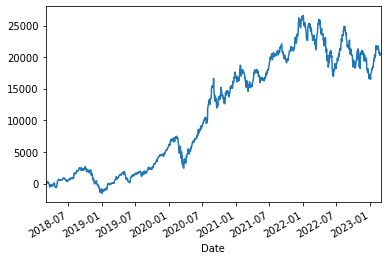

In [37]:
# Higher Volatility Portfolio (More risk, but potentially higher returns)
initial_investment = 10000
weights = [0.8, 0.2]
portfolio_returns = all_returns.dot(weights)

cumulative_returns = (1 + portfolio_returns).cumprod() - 1
(initial_investment * cumulative_returns).plot()

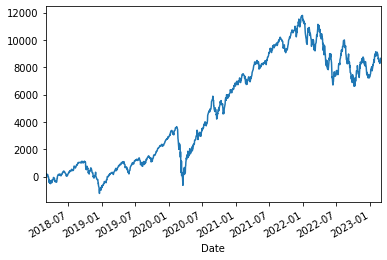

In [40]:
# Lower Volatility Portfolio (More risk, but potentially higher returns)
initial_investment = 10000
weights = [0.2, 0.8]
portfolio_returns = all_returns.dot(weights)
cumulative_return = (1 + portfolio_returns).cumprod() - 1
(initial_investment * cumulative_return).plot();

In [41]:
import os

In [44]:
os.listdir(".")
# for file in os.listdir("."):
#     print(f"./{file}")

./Fintech_Bootcamp_Pandas_1.ipynb
./Customers.csv
./tech_stock_closing_value.csv
./.DS_Store
./.localized
./drowning.csv
./ice_cream.csv
./TSLA_Nasdaq.csv
./SPY.csv
./Fintech_Bootcamp_Python-Pandas_2.ipynb
./.ipynb_checkpoints
./coin_Ethereum.csv
./AAPL.csv
./Fintech_Bootcamp_Python-Pandas_3.ipynb


## Pandas Practice - Columns

In [84]:
customers_df = pd.read_csv('Customers.csv')
customers_df.head()

,customerID,companyName,contactName,contactTitle,address,city,region,postalCode,country,phone,fax,salesAmount,dollarAmount
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545,100.73,$100.30
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,NaN,5021,Mexico,(5) 555-4729,(5) 555-3745,101.00,$101.70
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,NaN,5023,Mexico,(5) 555-3932,NaN,NaN,$103.10
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750,103.00,$104.50
4,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,NaN,21240,Finland,90-224 8858,90-224 8858,189.90,$105.90


In [85]:
# Rename column
customers_df = customers_df.rename(columns={"companyName": "Company Name", 
                                            "contactName": "Contact Name", 
                                            "contactTitle": "Contact Title",
                                            "address": "ADDRESS",
                                            "salesAmount": "Sales Amount"})
customers_df.head()

,customerID,Company Name,Contact Name,Contact Title,ADDRESS,city,region,postalCode,country,phone,fax,Sales Amount,dollarAmount
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545,100.73,$100.30
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,NaN,5021,Mexico,(5) 555-4729,(5) 555-3745,101.00,$101.70
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,NaN,5023,Mexico,(5) 555-3932,NaN,NaN,$103.10
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750,103.00,$104.50
4,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,NaN,21240,Finland,90-224 8858,90-224 8858,189.90,$105.90


In [86]:
customers_df.size

1196

In [87]:
# Reorder columns
# Use a list of re-ordered column names to alter the column order of the original dataframe
customers_df = customers_df[['dollarAmount', 'fax', 'phone', 'ADDRESS', 'customerID', 'Company Name', 
                             'Contact Name', 'Contact Title', 'Sales Amount']]
customers_df

,dollarAmount,fax,phone,ADDRESS,customerID,Company Name,Contact Name,Contact Title,Sales Amount
0,$100.30,030-0076545,030-0074321,Obere Str. 57,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,100.73
1,$101.70,(5) 555-3745,(5) 555-4729,Avda. de la Constitución 2222,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,101.00
2,$103.10,NaN,(5) 555-3932,Mataderos 2312,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,NaN
3,$104.50,(171) 555-6750,(171) 555-7788,120 Hanover Sq.,AROUT,Around the Horn,Thomas Hardy,Sales Representative,103.00
4,$105.90,90-224 8858,90-224 8858,Keskuskatu 45,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,189.90
...,...,...,...,...,...,...,...,...,...
87,$222.10,981-443655,981-443655,Torikatu 38,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,186.00
88,$223.50,(14) 555-8122,Brazil,Rua do Mercado,WELLI,Wellington Importadora,Paula Parente,Sales Manager,187.00
89,$224.90,(206) 555-4115,(206) 555-4112,305 - 14th Ave. S. Suite 3B,WHITC,White Clover Markets,Karl Jablonski,Owner,NaN
90,$226.30,90-224 8858,90-224 8858,Keskuskatu 45,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,189.90


In [88]:
customers_df.loc[:,"fax":"customerID"]

,fax,phone,ADDRESS,customerID
0,030-0076545,030-0074321,Obere Str. 57,ALFKI
1,(5) 555-3745,(5) 555-4729,Avda. de la Constitución 2222,ANATR
2,NaN,(5) 555-3932,Mataderos 2312,ANTON
3,(171) 555-6750,(171) 555-7788,120 Hanover Sq.,AROUT
4,90-224 8858,90-224 8858,Keskuskatu 45,WILMK
...,...,...,...,...
87,981-443655,981-443655,Torikatu 38,WARTH
88,(14) 555-8122,Brazil,Rua do Mercado,WELLI
89,(206) 555-4115,(206) 555-4112,305 - 14th Ave. S. Suite 3B,WHITC
90,90-224 8858,90-224 8858,Keskuskatu 45,WILMK


In [89]:
customers_df[customers_df["customerID"] == "WELLI"]

,dollarAmount,fax,phone,ADDRESS,customerID,Company Name,Contact Name,Contact Title,Sales Amount
88,$223.50,(14) 555-8122,Brazil,Rua do Mercado,WELLI,Wellington Importadora,Paula Parente,Sales Manager,187.0


In [90]:
aapl_df[aapl_df["Close"] > 150]

,Close,Symbol
Date,,
2021-08-16,151.119995,AAPL
2021-08-17,150.190002,AAPL
2021-08-30,153.119995,AAPL
2021-08-31,151.830002,AAPL
2021-09-01,152.509995,AAPL
...,...,...
2023-02-13,153.850006,AAPL
2023-02-14,153.199997,AAPL
2023-02-15,155.330002,AAPL


In [91]:
aapl_df["Close"] > 150

Date
2018-03-01    False
2018-03-02    False
2018-03-05    False
2018-03-06    False
2018-03-07    False
              ...  
2023-02-22    False
2023-02-23    False
2023-02-24    False
2023-02-27    False
2023-02-28    False
Name: Close, Length: 1258, dtype: bool

In [92]:
aapl_df.iloc[0]

Close     43.75
Symbol     AAPL
Name: 2018-03-01 00:00:00, dtype: object

In [93]:
aapl_df.loc[aapl_df.Close > 150, :]

,Close,Symbol
Date,,
2021-08-16,151.119995,AAPL
2021-08-17,150.190002,AAPL
2021-08-30,153.119995,AAPL
2021-08-31,151.830002,AAPL
2021-09-01,152.509995,AAPL
...,...,...
2023-02-13,153.850006,AAPL
2023-02-14,153.199997,AAPL
2023-02-15,155.330002,AAPL


In [115]:
# Create Additional Column: Use the `randint` function to randomly generate an `Age` from 22 to 65
customers_df['Age'] = np.random.randint(low=22, high=65, size=len(customers_df))       # 22 <= num < 65
customers_df

,dollarAmount,fax,phone,ADDRESS,customerID,Company Name,Contact Name,Contact Title,Sales Amount,Age
0,$100.30,030-0076545,030-0074321,Obere Str. 57,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,100.73,57
1,$101.70,(5) 555-3745,(5) 555-4729,Avda. de la Constitución 2222,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,101.00,45
2,$103.10,NaN,(5) 555-3932,Mataderos 2312,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,NaN,22
3,$104.50,(171) 555-6750,(171) 555-7788,120 Hanover Sq.,AROUT,Around the Horn,Thomas Hardy,Sales Representative,103.00,48
4,$105.90,90-224 8858,90-224 8858,Keskuskatu 45,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,189.90,47
...,...,...,...,...,...,...,...,...,...,...
87,$222.10,981-443655,981-443655,Torikatu 38,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,186.00,34
88,$223.50,(14) 555-8122,Brazil,Rua do Mercado,WELLI,Wellington Importadora,Paula Parente,Sales Manager,187.00,50
89,$224.90,(206) 555-4115,(206) 555-4112,305 - 14th Ave. S. Suite 3B,WHITC,White Clover Markets,Karl Jablonski,Owner,NaN,49
90,$226.30,90-224 8858,90-224 8858,Keskuskatu 45,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,189.90,51


In [117]:
# Delete columns
# Use the `drop` function to delete the newly created `Age` column
customers_df = customers_df.drop(columns=['Age'])
customers_df

,dollarAmount,fax,phone,ADDRESS,customerID,Company Name,Contact Name,Contact Title,Sales Amount
0,$100.30,030-0076545,030-0074321,Obere Str. 57,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,100.73
1,$101.70,(5) 555-3745,(5) 555-4729,Avda. de la Constitución 2222,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,101.00
2,$103.10,NaN,(5) 555-3932,Mataderos 2312,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,NaN
3,$104.50,(171) 555-6750,(171) 555-7788,120 Hanover Sq.,AROUT,Around the Horn,Thomas Hardy,Sales Representative,103.00
4,$105.90,90-224 8858,90-224 8858,Keskuskatu 45,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,189.90
...,...,...,...,...,...,...,...,...,...
87,$222.10,981-443655,981-443655,Torikatu 38,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,186.00
88,$223.50,(14) 555-8122,Brazil,Rua do Mercado,WELLI,Wellington Importadora,Paula Parente,Sales Manager,187.00
89,$224.90,(206) 555-4115,(206) 555-4112,305 - 14th Ave. S. Suite 3B,WHITC,White Clover Markets,Karl Jablonski,Owner,NaN
90,$226.30,90-224 8858,90-224 8858,Keskuskatu 45,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,189.90


In [118]:
# Save the DataFrame to the `Resource` folder
# customers_df.to_csv("customers_dataframe.csv")

In [135]:
customers_df.dtypes

dollarAmount       object
fax                object
phone              object
ADDRESS            object
customerID         object
Company Name       object
Contact Name       object
Contact Title      object
Sales Amount      float64
Sales Level      category
dtype: object

## Pandas Practice - Binning

`pd.cut()` function is the function used for binning.

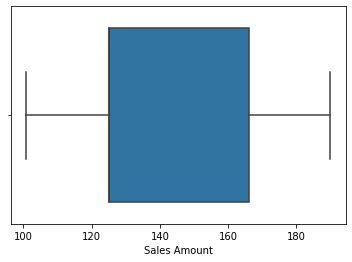

In [121]:
sns.boxplot(customers_df['Sales Amount'])

In [130]:
# Create bins for total ranking
# Create the variable bins to define our bounds for when we cut the dataframe.
bins = [90, 120, 140, 160, 180, 200]

# Vreate names for the bins
group_names = ["Super Low", "Low", "Moderate", "High", "Super High"]

# Label Records according to corresponding bin
# Add a column named "Sales Level" to customers_df and slice the data into the bins
customers_df["Sales Level"] = pd.cut(customers_df["Sales Amount"], bins, labels=group_names)   # Bin labels must be one fewer than the number of bin edges
customers_df

,dollarAmount,fax,phone,ADDRESS,customerID,Company Name,Contact Name,Contact Title,Sales Amount,Sales Level
0,$100.30,030-0076545,030-0074321,Obere Str. 57,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,100.73,Super Low
1,$101.70,(5) 555-3745,(5) 555-4729,Avda. de la Constitución 2222,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,101.00,Super Low
2,$103.10,NaN,(5) 555-3932,Mataderos 2312,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,NaN,NaN
3,$104.50,(171) 555-6750,(171) 555-7788,120 Hanover Sq.,AROUT,Around the Horn,Thomas Hardy,Sales Representative,103.00,Super Low
4,$105.90,90-224 8858,90-224 8858,Keskuskatu 45,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,189.90,Super High
...,...,...,...,...,...,...,...,...,...,...
87,$222.10,981-443655,981-443655,Torikatu 38,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,186.00,Super High
88,$223.50,(14) 555-8122,Brazil,Rua do Mercado,WELLI,Wellington Importadora,Paula Parente,Sales Manager,187.00,Super High
89,$224.90,(206) 555-4115,(206) 555-4112,305 - 14th Ave. S. Suite 3B,WHITC,White Clover Markets,Karl Jablonski,Owner,NaN,NaN
90,$226.30,90-224 8858,90-224 8858,Keskuskatu 45,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,189.90,Super High


In [134]:
customers_df[customers_df['Sales Level'] == 'High']

,dollarAmount,fax,phone,ADDRESS,customerID,Company Name,Contact Name,Contact Title,Sales Amount,Sales Level
63,$188.50,NaN,0372-035188,Taucherstraße 10,QUICK,QUICK-Stop,Horst Kloss,Accounting Manager,162.0,High
65,$191.30,(505) 555-3620,(505) 555-5939,2817 Milton Dr.,RATTC,Rattlesnake Canyon Grocery,Paula Wilson,Assistant Sales Representative,164.0,High
66,$192.70,0522-556722,0522-556721,Strada Provinciale 124,REGGC,Reggiani Caseifici,Maurizio Moroni,Sales Associate,165.0,High
67,$194.10,(21) 555-3412,Brazil,Av. Copacabana,RICAR,Ricardo Adocicados,Janete Limeira,Assistant Sales Agent,166.0,High
69,$196.90,(91) 745 6200,Spain,Gran Vía,ROMEY,Romero y tomillo,Alejandra Camino,Accounting Manager,168.0,High
70,$198.30,07-98 92 47,07-98 92 35,Erling Skakkes gate 78,SANTG,Santé Gourmet,Jonas Bergulfsen,Owner,169.0,High
71,$199.70,NaN,(208) 555-8097,187 Suffolk Ln.,SAVEA,Save-a-lot Markets,Jose Pavarotti,Sales Representative,170.0,High
72,$201.10,(171) 555-5646,(171) 555-1717,90 Wadhurst Rd.,SEVES,Seven Seas Imports,Hari Kumar,Sales Manager,171.0,High
73,$202.50,31 13 35 57,31 12 34 56,Vinbæltet 34,SIMOB,Simons bistro,Jytte Petersen,Owner,172.0,High
75,$205.30,(307) 555-6525,(307) 555-4680,P.O. Box 555,SPLIR,Split Rail Beer & Ale,Art Braunschweiger,Sales Manager,174.0,High


In [136]:
customers_df.dtypes

dollarAmount       object
fax                object
phone              object
ADDRESS            object
customerID         object
Company Name       object
Contact Name       object
Contact Title      object
Sales Amount      float64
Sales Level      category
dtype: object